<div style="background-color: #3b3745; padding: 30px; margin: 10px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.5);">
  <h2 style="font-size: 36px; color: #fff; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3);">Explore Image processing with CNN model</h2>
</div>


# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"><b><span style='color:#F1A424'>1 |</span></b> <b>Butterfly detection</b></div>
    
- <b>Data Processing</b>
- <b>Label Encoding</b>
- <b>Adding non butterfly images</b>
    - <b>Imbalanced data visualization</b> 
    - <b>Data augmentation</b> 
- <b>Image Processing</b>
- <b>Splitting data training and testing</b>
- <b>Building model (Detection)</b>
    

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"><b><span style='color:#F1A424'>2 |</span></b> <b>Butterfly Classification</b></div>    
- <b>Splitting data</b>
- <b>Building Model</b></div>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import cv2 as cv
import warnings 
warnings.filterwarnings('ignore')

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"><b><span style='color:#F1A424'>1 |</span></b> <b>Butterfly detection</b></div>

<div>
  <h2 style="font-size: 24px; color: #F1A424; text-align: center;">Data Processing </h2>
</div>

In [2]:
df_train = pd.read_csv("/kaggle/input/butterfly-image-classification/Training_set.csv")
df_test = pd.read_csv("/kaggle/input/butterfly-image-classification/Testing_set.csv")
df_train.sample(5)

,filename,label
3689,Image_3690.jpg,ORANGE TIP
2145,Image_2146.jpg,QUESTION MARK
6243,Image_6244.jpg,PURPLE HAIRSTREAK
1311,Image_1312.jpg,ELBOWED PIERROT
5392,Image_5393.jpg,EASTERN COMA


In [3]:
df_test.head()

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


In [4]:
df_train.info(),df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
dtypes: object(2)
memory usage: 101.7+ KB


(None, (6499, 2))

In [5]:
df_test.info(),df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2786 non-null   object
dtypes: object(1)
memory usage: 21.9+ KB


(None, (2786, 1))

In [6]:
df = pd.concat([df_train[['filename']],df_test[['filename']]],axis='rows')
df['label'] = [1]*len(df)
df.sample(3)

,filename,label
1535,Image_1536.jpg,1
2688,Image_2689.jpg,1
725,Image_726.jpg,1


<div>
  <h2 style="font-size: 24px; color: #F1A424; text-align: center;">Label Encoding </h2>
</div>

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_train['label_en'] = encoder.fit_transform(df_train['label'])
df_train.sample(3)

,filename,label,label_en
6448,Image_6449.jpg,EASTERN DAPPLE WHITE,27
4891,Image_4892.jpg,CRIMSON PATCH,24
3195,Image_3196.jpg,WOOD SATYR,72


<div>
  <h2 style="font-size: 24px; color: #F1A424; text-align: center;">Adding non butterfly images </h2>
</div>

In [8]:
non_target = []
MAIN_FILE = "/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/"
for img in os.listdir(MAIN_FILE):
    non_target.append(img)

In [9]:
non_target[:10]

['photo-1635057633867-bbb11bd336b3.jpg',
 'photo-1602485467114-f85820ce228f.jpg',
 'photo-1633113211800-4acbb59fc254.jpg',
 'photo-1541958409-7618fd1ad26e.jpg',
 'photo-1638051894614-a60031fc6962.jpg',
 'photo-1639033302448-1b98bbf802bf.jpg',
 'photo-1637310917417-a270927f4fba.jpg',
 'photo-1576442849893-92c987a8ef80.jpg',
 'photo-1635967200497-6a83775bf395.jpg',
 'photo-1635990215165-9f03a3c06d93.jpg']

In [10]:
non_target_labels = np.c_[non_target,[0]*len(non_target)]
non_df = pd.DataFrame(non_target_labels,columns=['filename','label'])
non_df.head()

,filename,label
0,photo-1635057633867-bbb11bd336b3.jpg,0
1,photo-1602485467114-f85820ce228f.jpg,0
2,photo-1633113211800-4acbb59fc254.jpg,0
3,photo-1541958409-7618fd1ad26e.jpg,0
4,photo-1638051894614-a60031fc6962.jpg,0


<h2 style="font-size: 18px; color: #777; text-align: right; font-style: italic;">Imbalanced data visualization</h2>

In [11]:
import plotly.graph_objects as go

P = len(df)
N = len(non_df)

layout = go.Layout(
    title='Imbalanced data'
)
def plot_pie_chart(labels, values):
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
    fig.show()

labels = ['positive', 'Negative']
values = [P,N]
plot_pie_chart(labels, values)


> Here you can it is very much imbalanced, so its time to balance it.

<h2 style="font-size: 18px; color: #777; text-align: right; font-style: italic;">Data augmentation </h2>

(48120, 40, 40, 3)


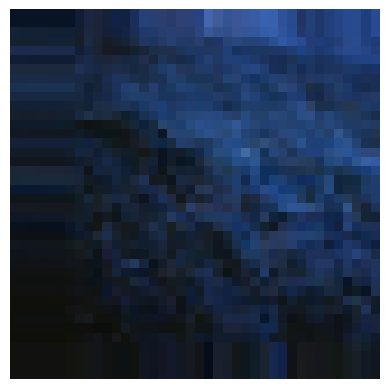

In [12]:
non_target = []
IMAGE_SIZE = (40,40)
for img in non_df['filename']:
    img = cv.imread("/kaggle/input/unsplash-random-images-collection/unsplash-images-collection/"+img)
    img = cv.resize(img,IMAGE_SIZE)
    non_target.append(img/255.0)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator class
datagen = ImageDataGenerator(
    rotation_range=30,  # Randomly rotate images by 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the total width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of the total height
    shear_range=0.3,  # Apply shear transformation with a shear angle of 30 degrees
    zoom_range=0.3,  # Randomly zoom images by up to 30%
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=False  # Do not perform vertical flips
)

# Example grayscale numpy array of images (3D)
images = non_target # Shape: (num_samples, height, width)

# Generate augmented grayscale images
augmented_images = []

for image in images:
    num_generated_images = 0

    while num_generated_images < 60:
        augmented_image = datagen.random_transform(image)
        augmented_images.append(augmented_image)
        num_generated_images += 1
# Convert augmented grayscale images back to a NumPy array
augmented_images = np.array(augmented_images)
non_target = np.squeeze(augmented_images)
print(non_target.shape)
plt.imshow(non_target[0])
plt.axis('off')
plt.show()

<div>
  <h2 style="font-size: 24px; color: #F1A424; text-align: center;">Image Processing</h2>
</div>

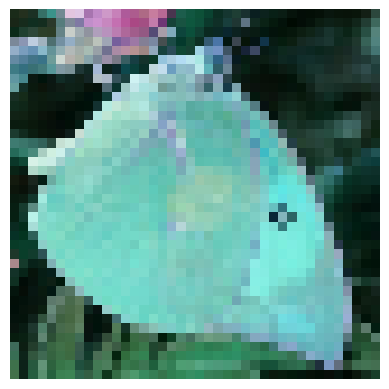

In [13]:
IMAGE_SIZE = (40,40)
IMAGE_SIZE_CLASS = (60,60)

train = []

# it is for classification model which we will se after detection process
train_class = [] 
train_labels = [] 

test = []

for img,label in zip(df_train['filename'],df_train['label_en']):
    img = cv.imread("/kaggle/input/butterfly-image-classification/train/"+img)
    det = cv.resize(img,IMAGE_SIZE)
    clas = cv.resize(img,IMAGE_SIZE_CLASS)
    train.append(det/255.0)
    train_class.append(clas/255.0)
    train_labels.append(label)
    
for img in df_test['filename']:
    img = cv.imread("/kaggle/input/butterfly-image-classification/test/"+img)
    img = cv.resize(img,IMAGE_SIZE)
    test.append(img/255.0)
plt.imshow(train[0])
plt.axis('off')
plt.show()

In [14]:
images = list(train)+list(test)

# Generate augmented images
augmented_images_target = []
for image in images:
    num_generated_images = 0

    while num_generated_images < 6:
        augmented_image = datagen.random_transform(image)
        augmented_images_target.append(augmented_image)
        num_generated_images += 1
        
augmented_images_target = np.array(augmented_images_target)
target = np.squeeze(augmented_images_target)
print(target.shape)

(55710, 40, 40, 3)


In [15]:
P = len(target)
N = len(non_target)

layout = go.Layout(
    title='Balanced data'
)
def plot_pie_chart(labels, values):
    fig = go.Figure(data=[go.Pie(labels=labels, values=values)],layout=layout)
    fig.show()

labels = ['positive', 'Negative']
values = [P,N]
plot_pie_chart(labels, values)


In [16]:
X = np.array(list(target)+list(non_target))
y = np.array([1]*len(target)+[0]*len(list(non_target)))

X.shape,y.shape

((103830, 40, 40, 3), (103830,))

<div>
  <h2 style="font-size: 24px; color: #F1A424; text-align: center;">Splitting Images into training and testing</h2>
</div>

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((77872, 40, 40, 3), (25958, 40, 40, 3), (77872,), (25958,))

<div>
  <h2 style="font-size: 24px; color: #F1A424; text-align: center;">Building CNN model (Detection)</h2>
</div>

In [18]:
import tensorflow as tf
from tensorflow import keras

In [19]:
# Define the CNN model
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(40, 40, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=6, batch_size=32)

Epoch 1/6
2434/2434 [==============================] - 78s 32ms/step - loss: 0.2817 - accuracy: 0.8812
Epoch 2/6
2434/2434 [==============================] - 77s 31ms/step - loss: 0.1822 - accuracy: 0.9276
Epoch 3/6
2434/2434 [==============================] - 75s 31ms/step - loss: 0.1350 - accuracy: 0.9467
Epoch 4/6
2434/2434 [==============================] - 75s 31ms/step - loss: 0.1056 - accuracy: 0.9583
Epoch 5/6
2434/2434 [==============================] - 76s 31ms/step - loss: 0.0853 - accuracy: 0.9671
Epoch 6/6
2434/2434 [==============================] - 75s 31ms/step - loss: 0.0703 - accuracy: 0.9739


In [20]:
model.evaluate(X_test,y_test)

812/812 [==============================] - 7s 9ms/step - loss: 0.1493 - accuracy: 0.9453


[0.149335116147995, 0.9452577233314514]

<div>
  <h2 style="font-size: 24px; color: #F1A424; text-align: center;">Detection Model evaluation</h2>
</div>

<div>
  <h2 style="font-size: 18px; color: #777; text-align: right; font-style: italic;">confusion matrix</h2>
</div>

In [21]:
tensors = tf.convert_to_tensor(np.array(X_test))
probabilities = model.predict(tensors)
threshold = 0.5
y_pred = (probabilities > threshold).astype(int)[:,0]
y_pred

812/812 [==============================] - 8s 9ms/step


array([1, 1, 1, ..., 0, 0, 1])

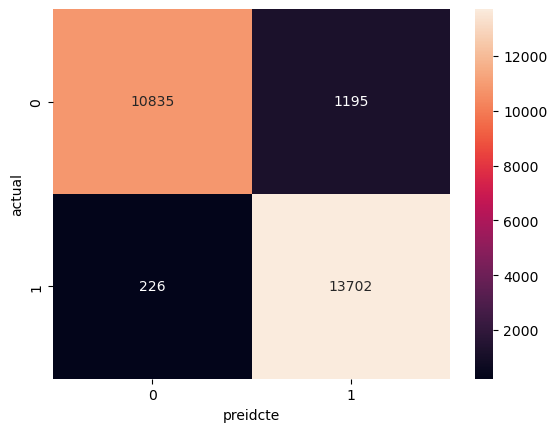

In [22]:
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix,classification_report
from seaborn import heatmap as hm

cm = confusion_matrix(y_test,y_pred)
hm(cm,annot=True,fmt='')
plt.xlabel("preidcte")
plt.ylabel("actual")
plt.show()

<div>
  <h2 style="font-size: 18px; color: #777; text-align: right; font-style: italic;">classification report</h2>
</div>

In [23]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     12030
           1       0.92      0.98      0.95     13928

    accuracy                           0.95     25958
   macro avg       0.95      0.94      0.94     25958
weighted avg       0.95      0.95      0.95     25958



# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"><b><span style='color:#F1A424'>2 |</span></b> <b>Butterfly classification</b></div>

<div>
  <h2 style="font-size: 24px; color: #F1A424; text-align: center;">Splitting images</h2>
</div>

In [24]:
train_class_np = np.array(train_class)
labels_np = np.array(train_labels)

X_train,X_test,y_train,y_test = train_test_split(train_class_np,labels_np,stratify=labels_np)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4874, 60, 60, 3), (1625, 60, 60, 3), (4874,), (1625,))

<div>
  <h2 style="font-size: 24px; color: #F1A424; text-align: center;">Building model (classification)</h2>
</div>

In [25]:
# Define the CNN model
model_classification = keras.Sequential()
model_classification.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(60, 60, 3)))
model_classification.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_classification.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_classification.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model_classification.add(keras.layers.Flatten())
model_classification.add(keras.layers.Dense(64, activation='relu'))
model_classification.add(keras.layers.Dense(len(np.unique(labels_np)), activation='softmax'))

# Compile the model
model_classification.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_classification.fit(X_train, y_train, epochs=6, batch_size=32)

Epoch 1/6
153/153 [==============================] - 15s 96ms/step - loss: 3.9580 - accuracy: 0.0753
Epoch 2/6
153/153 [==============================] - 12s 79ms/step - loss: 2.5691 - accuracy: 0.3250
Epoch 3/6
153/153 [==============================] - 12s 78ms/step - loss: 1.8150 - accuracy: 0.4986
Epoch 4/6
153/153 [==============================] - 12s 77ms/step - loss: 1.3819 - accuracy: 0.6018
Epoch 5/6
153/153 [==============================] - 12s 80ms/step - loss: 1.0248 - accuracy: 0.7023
Epoch 6/6
153/153 [==============================] - 12s 75ms/step - loss: 0.7263 - accuracy: 0.8014


In [26]:
model_classification.evaluate(X_test,y_test)

51/51 [==============================] - 1s 19ms/step - loss: 2.2957 - accuracy: 0.4671


[2.295729637145996, 0.4670769274234772]

In [27]:
probabilities = model_classification.predict(np.array(X_test))
y_pred = [np.argmax(img) for img in probabilities]
print(y_pred)

51/51 [==============================] - 1s 19ms/step
[40, 0, 8, 47, 25, 44, 7, 52, 27, 43, 20, 22, 65, 69, 28, 4, 72, 20, 33, 12, 51, 58, 59, 33, 57, 55, 47, 17, 36, 54, 30, 26, 43, 14, 40, 0, 10, 61, 10, 3, 40, 1, 37, 65, 42, 43, 8, 61, 5, 36, 65, 54, 30, 30, 53, 28, 8, 13, 8, 40, 69, 50, 44, 6, 38, 38, 69, 72, 39, 23, 36, 7, 74, 44, 4, 44, 33, 65, 58, 8, 14, 70, 30, 42, 35, 58, 32, 37, 24, 61, 5, 28, 53, 8, 45, 38, 73, 54, 67, 22, 40, 43, 38, 61, 19, 50, 46, 55, 1, 20, 58, 48, 35, 46, 55, 45, 9, 24, 57, 8, 73, 29, 10, 45, 43, 50, 26, 24, 57, 62, 20, 24, 67, 41, 15, 43, 10, 63, 62, 44, 26, 18, 20, 52, 7, 50, 43, 13, 57, 44, 49, 71, 25, 51, 72, 10, 43, 49, 61, 19, 11, 40, 68, 65, 27, 55, 61, 71, 37, 66, 0, 34, 29, 54, 53, 66, 49, 7, 64, 47, 63, 8, 66, 28, 28, 8, 22, 60, 17, 5, 43, 23, 45, 8, 20, 65, 51, 71, 42, 36, 19, 18, 48, 67, 46, 44, 74, 5, 65, 69, 22, 73, 36, 36, 23, 50, 1, 55, 10, 54, 0, 46, 73, 7, 44, 34, 68, 32, 40, 55, 44, 55, 4, 3, 24, 73, 67, 0, 13, 57, 50, 28, 72, 37, 5, 

In [28]:
probabilities = model_classification.predict(np.array([X_test[2]]))
probabilities

1/1 [==============================] - 0s 19ms/step


array([[1.7765606e-02, 7.8495168e-07, 3.5439237e-04, 8.2361765e-07,
        6.0688570e-02, 2.3918644e-06, 2.2353481e-09, 6.4119253e-05,
        3.7245598e-01, 1.4223799e-07, 1.5624137e-04, 7.3149390e-06,
        2.1091871e-06, 2.0291081e-01, 7.0481479e-07, 1.6161759e-07,
        4.6899466e-05, 8.2733069e-04, 9.3107827e-02, 4.3761011e-06,
        1.0675760e-03, 3.0379754e-04, 1.3971926e-02, 3.0570773e-06,
        1.4395702e-06, 1.3103456e-05, 7.0146133e-09, 5.3572366e-03,
        6.1347375e-05, 9.2275557e-05, 1.6016686e-05, 1.9934723e-05,
        2.0848461e-04, 4.3444857e-06, 8.3591631e-03, 2.1903418e-06,
        1.4799049e-05, 3.7957253e-08, 4.8905823e-02, 4.3468168e-05,
        3.1817388e-03, 1.3032624e-03, 2.6756770e-04, 1.9417728e-07,
        5.8668679e-09, 3.0513913e-06, 1.9803157e-03, 1.2949680e-01,
        6.0926641e-07, 6.7194344e-07, 1.0211670e-05, 1.8129995e-07,
        3.2523364e-02, 4.8592033e-06, 6.3662060e-06, 2.0947251e-03,
        1.1907683e-04, 6.1716594e-07, 4.7218096e

# <div style="padding: 30px;color:white;margin:10;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#3b3745"><b><span style='color:#F1A424'>3 |</span></b> <b>Conclusion</b></div>

In this Kaggle notebook, we have walked through the process of building a Convolutional Neural Network (CNN) model for butterfly image detection and classification. The main purpose of this notebook was to teach new coders how to perform image processing and train a deep neural network.

Here's a summary of the steps we covered:

### Data Processing
We began by preprocessing the butterfly image dataset, which involved resizing the images, normalizing pixel values, and splitting the data into training and testing sets. These steps ensured that the data was properly prepared for training the CNN model.

### Image Processing and Augmentation
To enhance the model's performance and address the issue of limited training data, we applied image processing techniques such as rotation, flipping, and zooming. Data augmentation increased the diversity of the training set and improved the model's ability to generalize to new, unseen butterfly images.

### Building the CNN Model
We then constructed a CNN model architecture using popular deep learning frameworks such as TensorFlow or PyTorch.

### Model Evaluation and Visualization
After training the model, we evaluated its performance using metrics such as accuracy, precision, recall, and F1 score. We also visualized the model's predictions on test images to gain insights into its capabilities and potential areas for improvement.

Overall, this notebook provided a step-by-step guide on image processing and training a CNN model for butterfly detection and classification. By following the provided code and explanations, new coders can gain hands-on experience in working with image data and deep neural networks, helping them to develop their skills in the exciting field of computer vision.